In [15]:
from game import Game
from minmax import Algorithms
from player import Player

# Opponent definition
All the tests are done using as opponent a player that uses $blMinMax$ algorithm and the standard heuristic

In [22]:
opponent = Player(color="white", algorithm=Algorithms.BRANCHING_LIMIT, engine_params={"L":3, "branching_factor": 8}, strong_level=3, statistics_mode=False)

## 1. Classic MinMax and standard heuristic
First test is done using the classic version of MinMax and the material advantage (standard) heuristic

In [4]:
game = Game(in_jupiter=True)

player = Player(color="black", algorithm=Algorithms.MIN_MAX, engine_params={"L":2}, strong_level=1, statistics_mode=True)


game.start_in_statistics_mode(
    nruns=5,
    ai_players={"white": opponent, "black": player},
    random_configuration_steps=20,
    no_display=False
)

Running games:   0%|          | 0/5 [00:03<?, ?it/s]


KeyboardInterrupt: 

As expected, the computation time increases with the number of pieces available for the player and, in consequence, with the number of available moves.

## 2. Classic MinMax and improved heuristic

The second test is done with the classic MinMax and with an improved heuristic that consider also piece mobility, control of the center, and king safety.

In [12]:
game = Game(in_jupiter=True)

player = Player(color="black", algorithm=Algorithms.MIN_MAX, engine_params={"L":5}, strong_level=6, statistics_mode=True)

game.start_in_statistics_mode(
    nruns=100,
    ai_players={"white": opponent, "black": player},
    random_configuration_steps=20,
    no_display=False
)

Running games:   0%|          | 0/100 [00:02<?, ?it/s]


KeyboardInterrupt: 

In [23]:
game = Game(in_jupiter=True)

player = Player(color="black", algorithm=Algorithms.BRANCHING_LIMIT, engine_params={"L":3, "branching_factor": 8}, strong_level=6, statistics_mode=True)

game.start_in_statistics_mode(
    nruns=15,
    ai_players={"white": opponent, "black": player},
    random_configuration_steps=20,
    no_display=False
)

Running games:  27%|██▋       | 4/15 [08:00<22:01, 120.13s/it]


KeyboardInterrupt: 

Running games: 100%|██████████| 15/15 [01:48<00:00,  7.26s/it]

Average moves times per piece: {1: 0, 2: 0, 3: 0, 4: 0.10213382588992329, 5: 0.08523117390290079, 6: 0.08650836548485315, 7: 0.1036094152446031, 8: 0.10770000944604406, 9: 0.11322063878672012, 10: 0.10486156216253599, 11: 0.10631340413581668, 12: 0.12254462089944393, 13: 0.11539281226400834, 14: 0.1259142301214023, 15: 0.08903862946275351, 16: 0.08067019922392708}
Win rate: 0, Wins: 0, Draws: 15, Runs: 15, Failed: 0


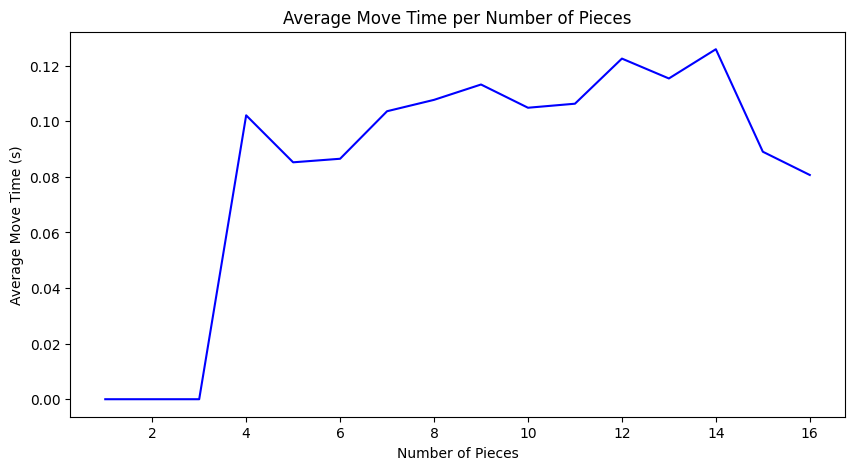

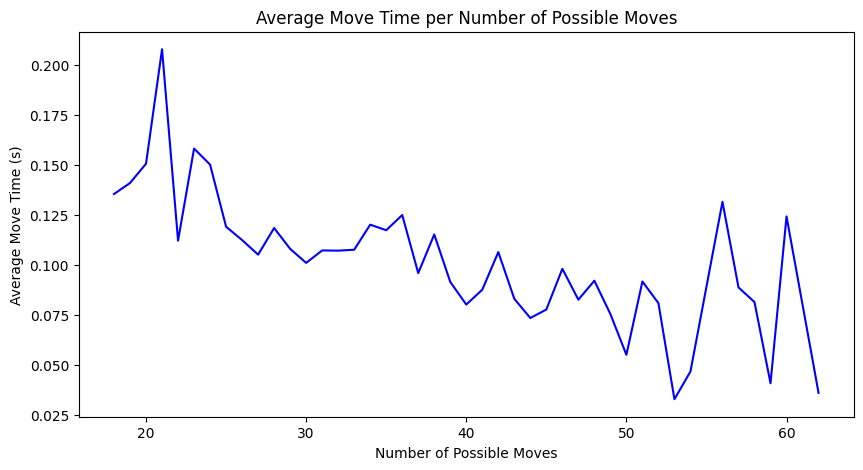

In [21]:
game = Game(in_jupiter=True)

player = Player(color="black", algorithm=Algorithms.BRANCHING_LIMIT, engine_params={"L":3, "branching_factor":8}, strong_level=1, statistics_mode=True)

game.start_in_statistics_mode(
    nruns=15,
    ai_players={"white": opponent, "black": player},
    random_configuration_steps=20,
    no_display=False
)